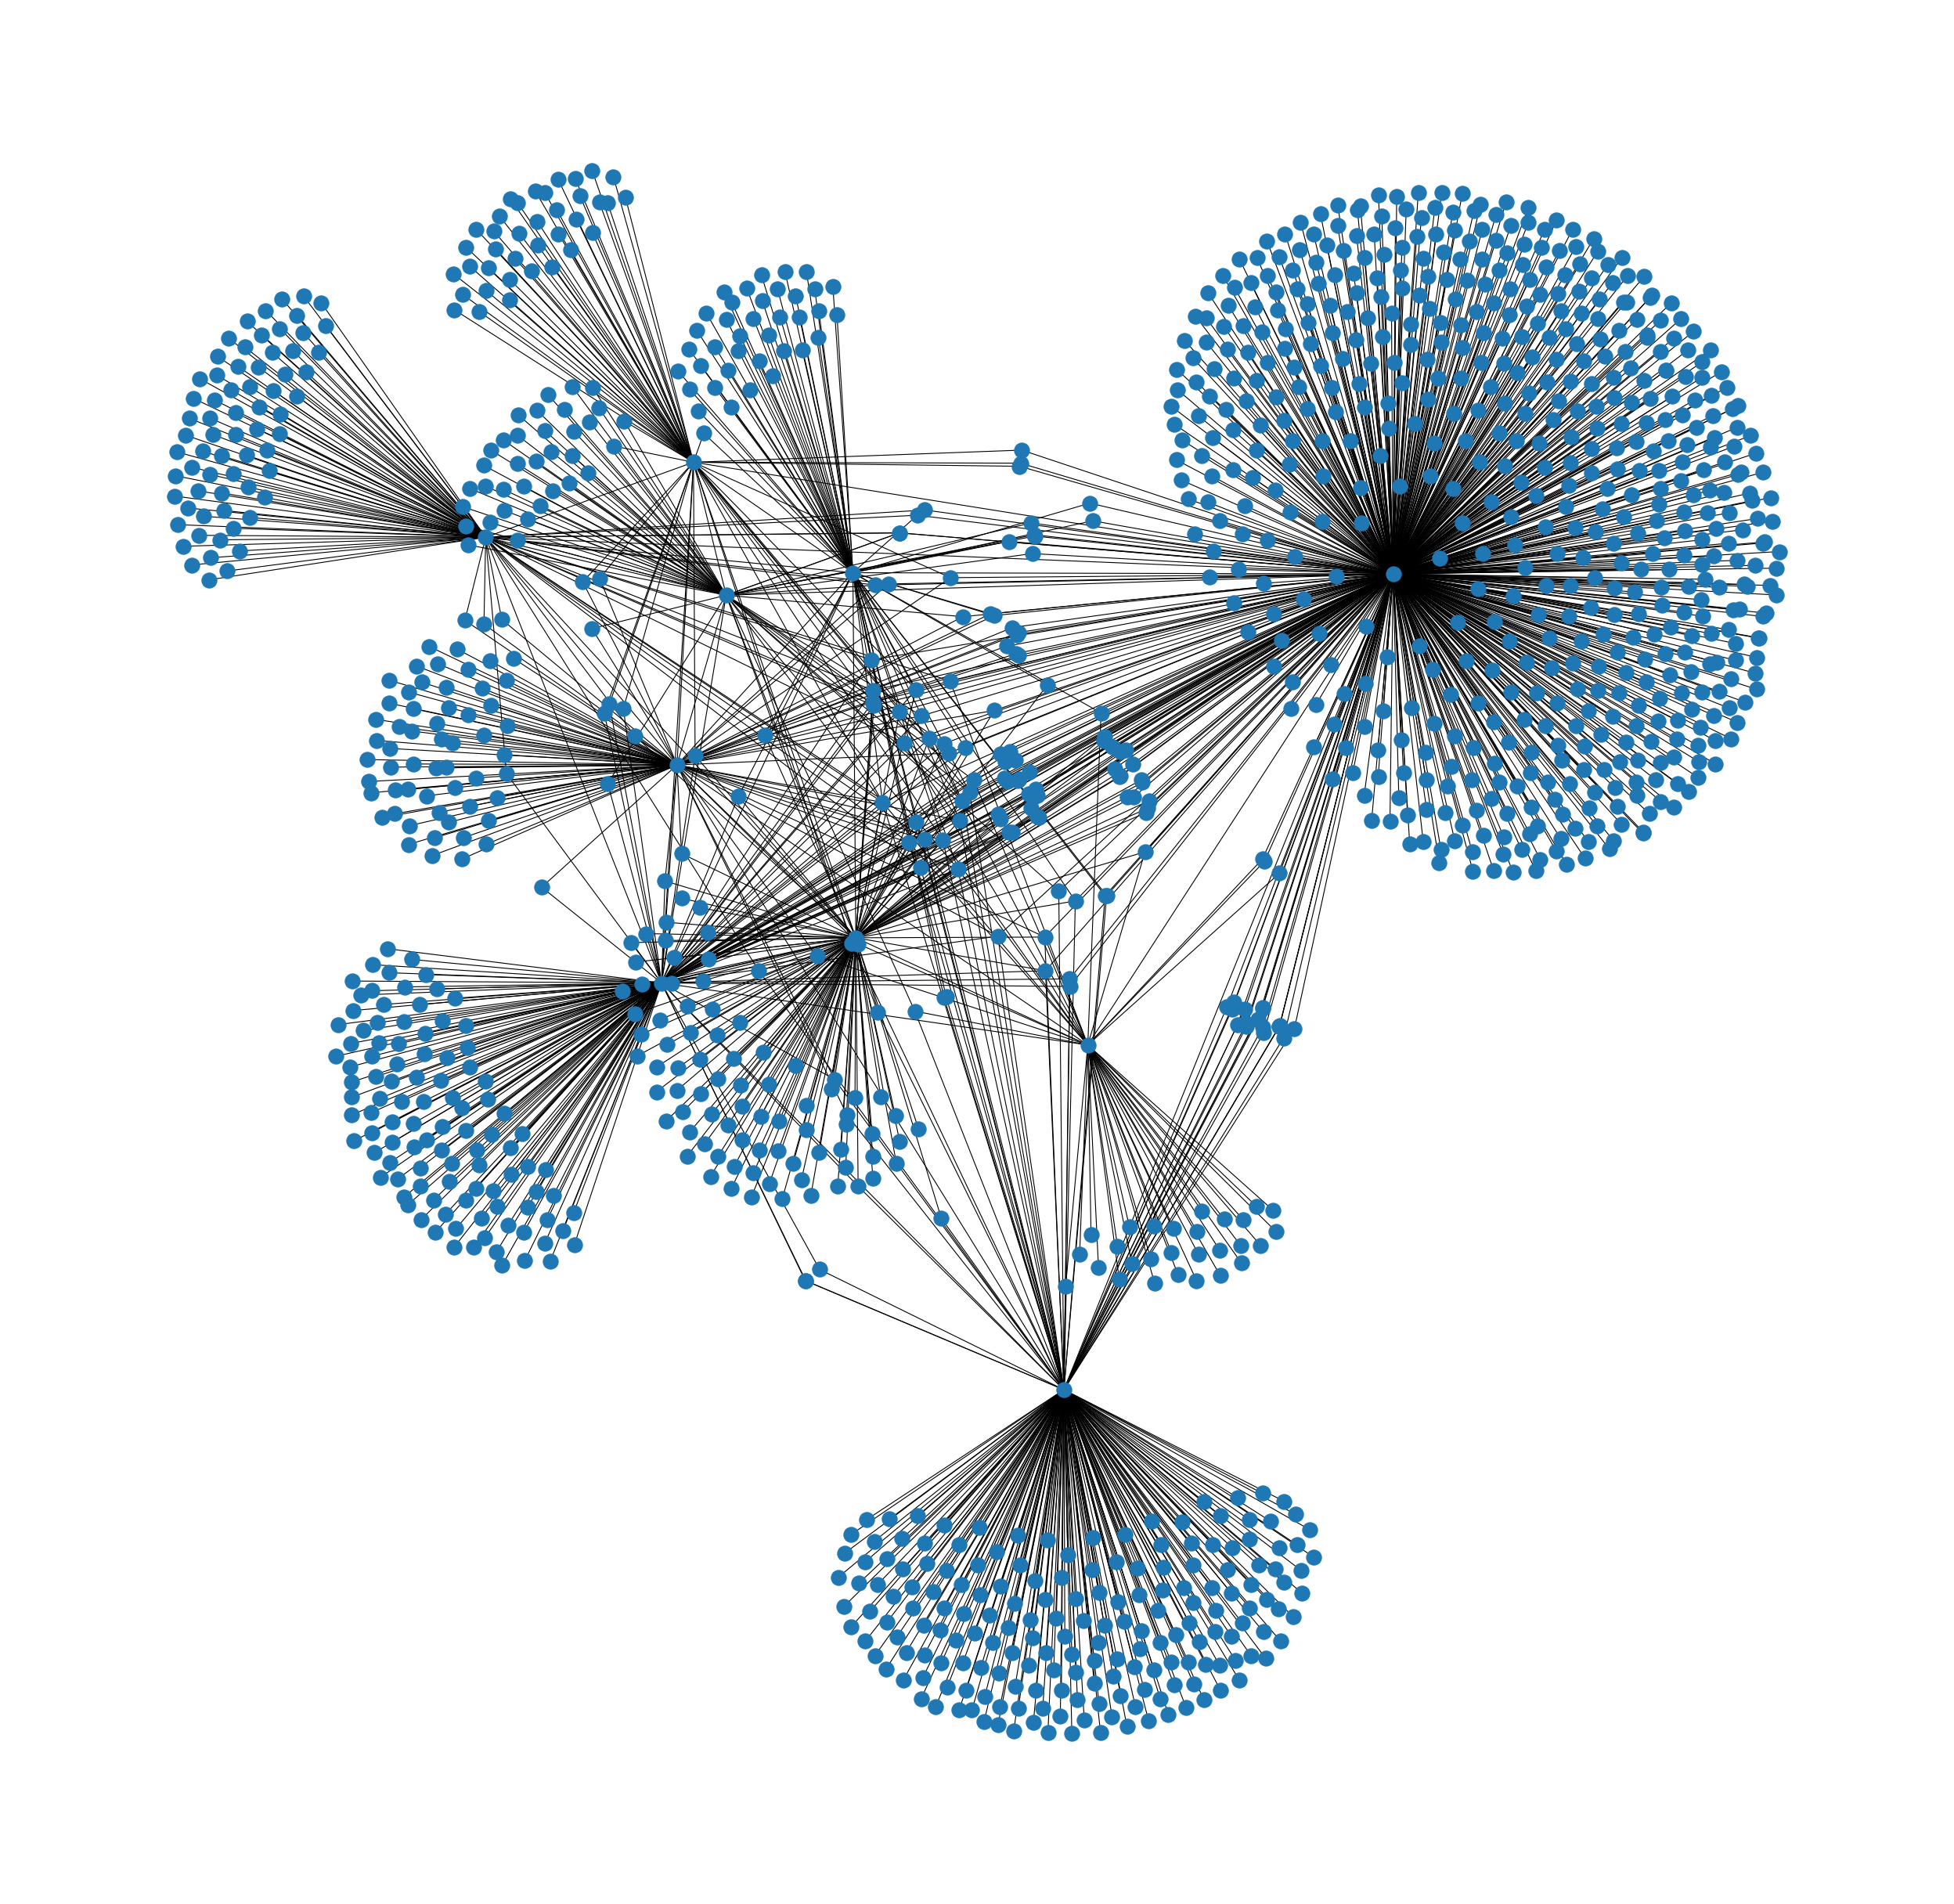

In [1]:
import json
with open("./userNetSave.json","r",encoding="utf-8") as f:
    data = json.load(f)
data_clean = {key:data[key] for key in data if data[key]}
to_remove =[]
for key in data_clean:
    if len(data_clean[key]) == 1:
        foreign_key = list(data_clean[key].keys())[0]
        if not foreign_key in data_clean or \
            (len(data_clean[foreign_key]) == 1 and key in data_clean[foreign_key]):
            to_remove.append(key)
            to_remove.append(foreign_key)
            continue
    if len(data[key]) == 0:
        to_remove.append(key)

# print(len(to_remove),len(data_clean))
for item in to_remove:
    data_clean.pop(item,None)

len(data_clean),len(to_remove)
length_dict = {key: len(value) for key, value in data_clean.items()}
max_keys = []
for i in range(10):
    maxKey = max(length_dict,key=length_dict.get)
    length_dict.pop(maxKey,None)
    max_keys.append(maxKey)

top10 = {key:data_clean[key] for key in max_keys}
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph(top10)
G.remove_edges_from(nx.selfloop_edges(G))
plt.figure(num=None,figsize=(40,40),dpi=80)
plt.axis('off')
fig = plt.figure(1)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos=pos)
nx.draw_networkx_edges(G,pos=pos)

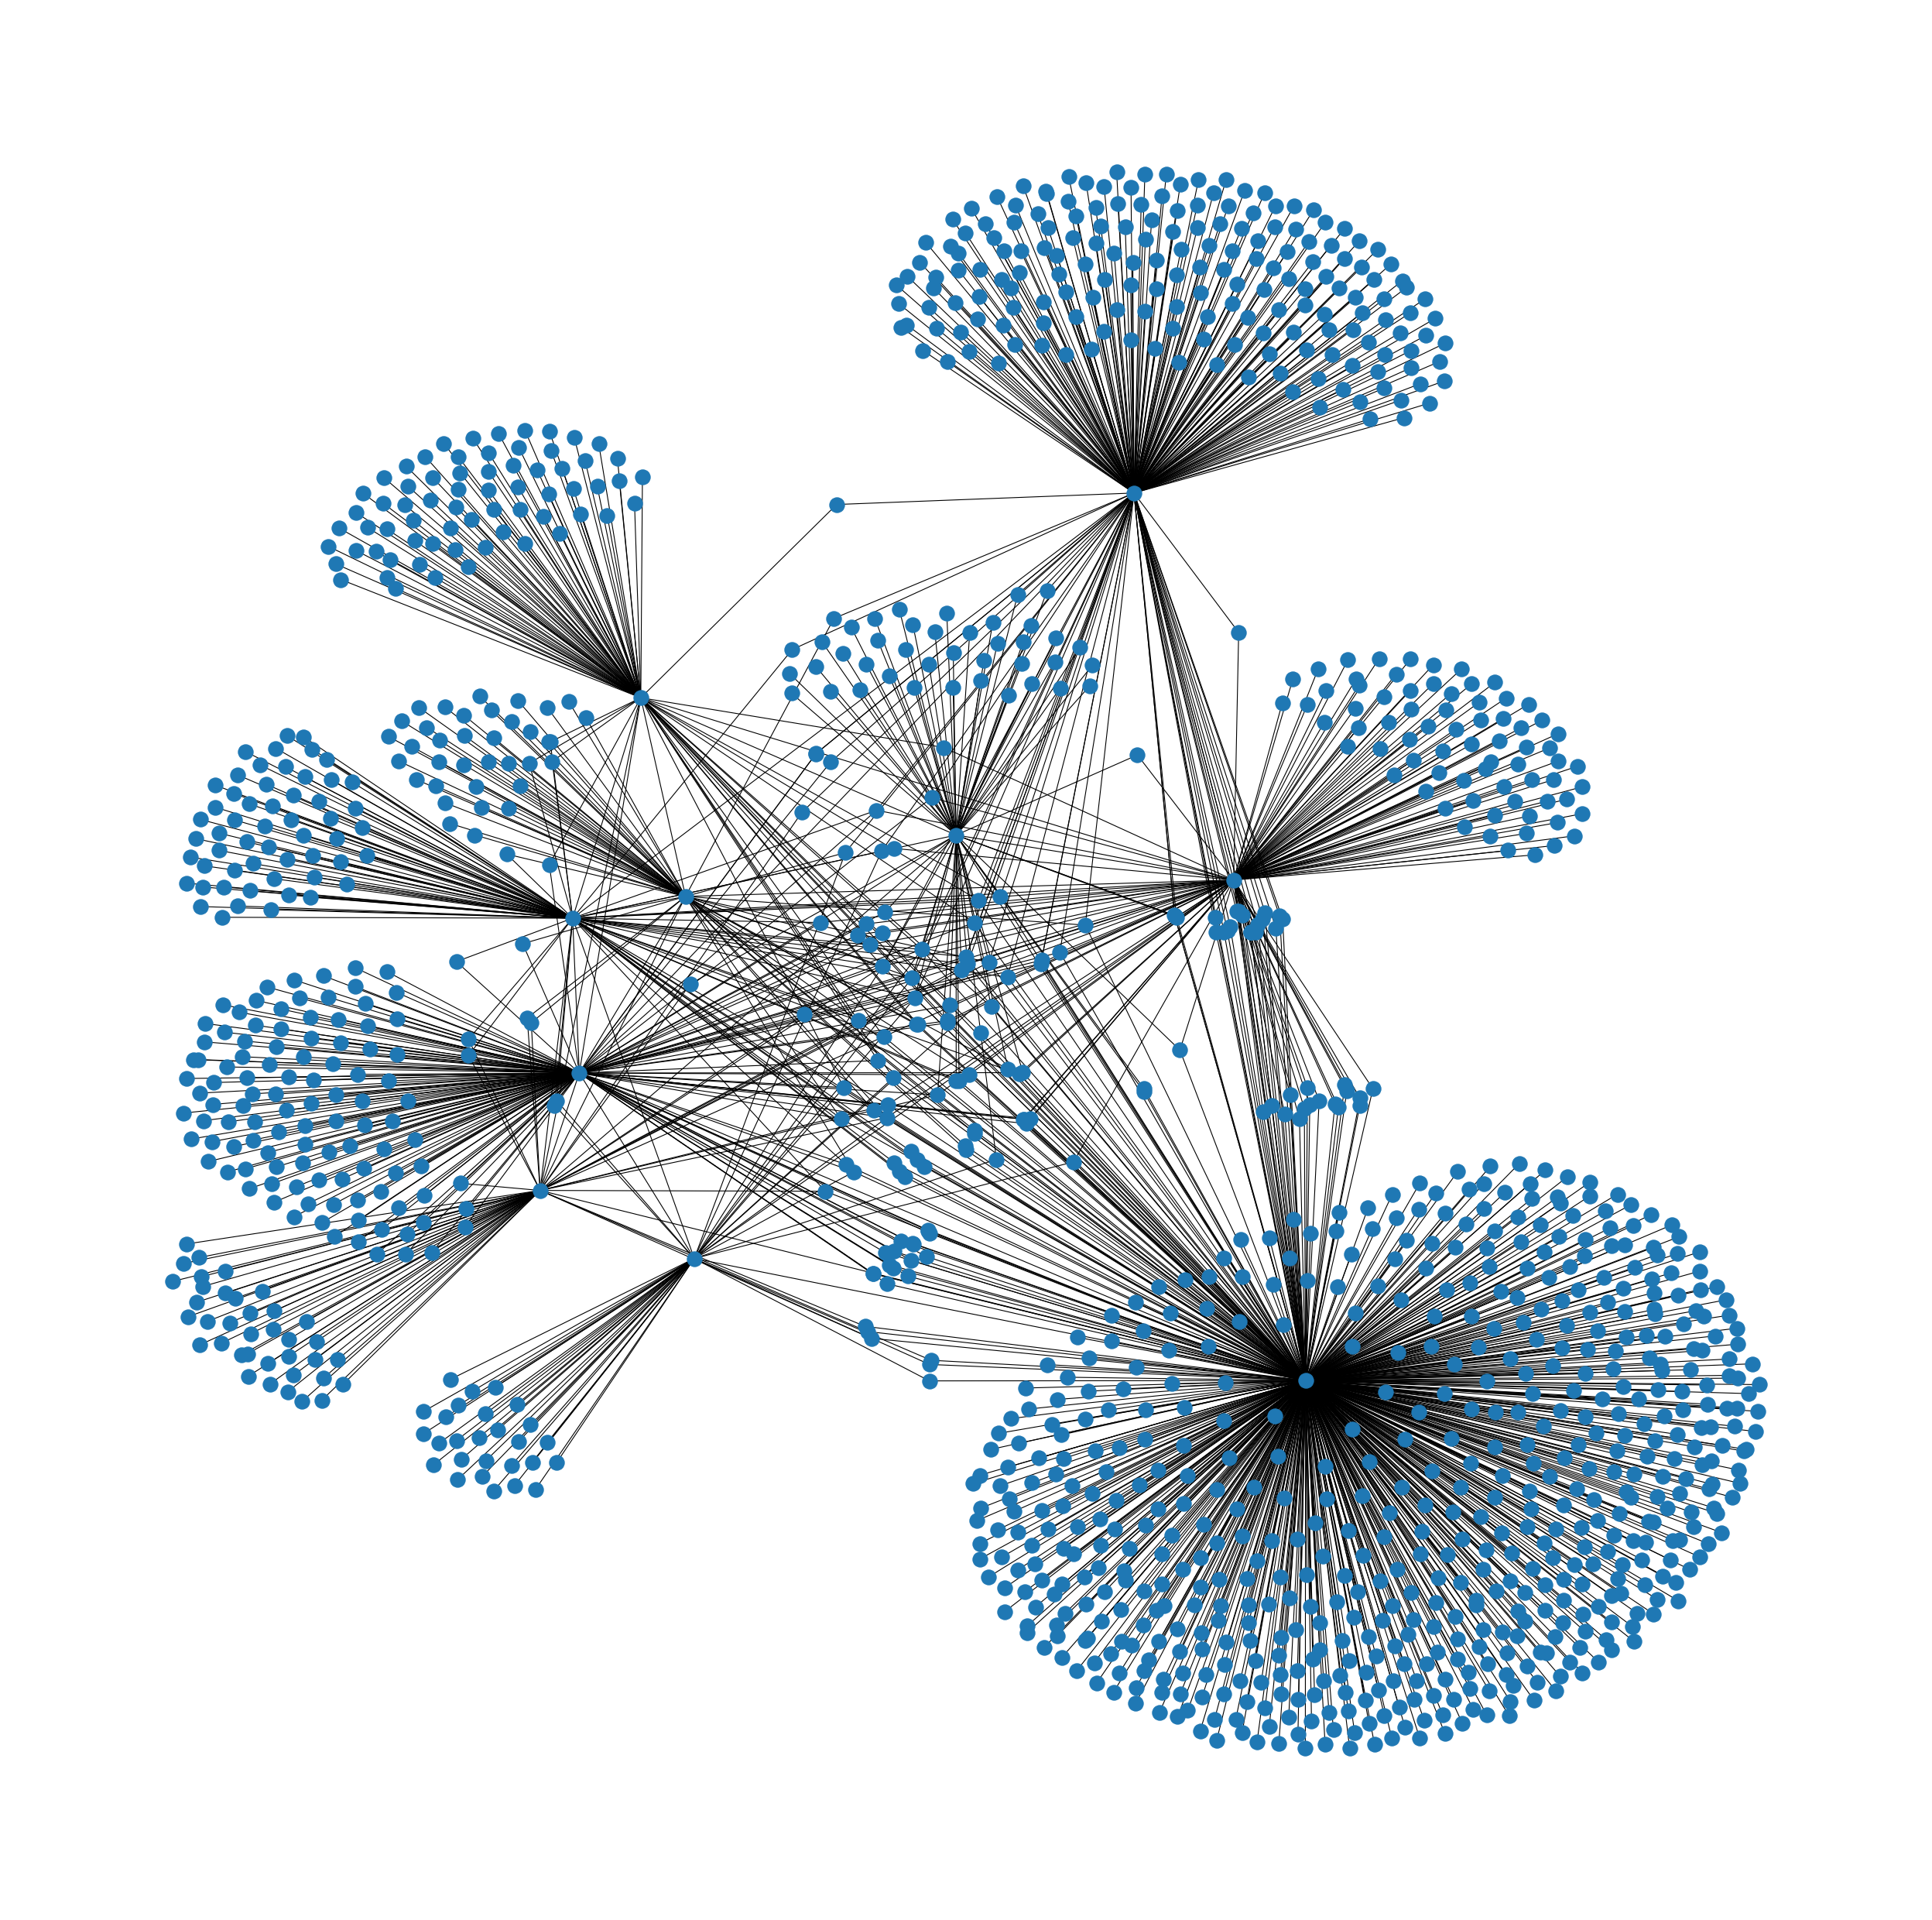